This is a Julian fork of the 12 steps to Navier-Stokes (Python) [https://github.com/barbagroup/CFDPython] by Lorena A. Barba, Gilbert F. Forsyth . All content of that work is under Creative Commons Attribution CC-BY 4.0, and all python code is under BSD-3 clause. This work also derives from similar forks by Cysor [https://github.com/Cysor/CFDJulia] and by Wallace-dyfq [https://github.com/Wallace-dyfq/CFD-Julia-12-steps--o-Navier-Stokes-Equations]

Step 2: Non-linear Convection
-----
***

Now we're going to implement non-linear convection using the same methods as in step 1.  The 1D convection equation is:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Instead of a constant factor $c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is now *non-linear*  We're going to use the same discretization as in Step 1 — forward difference in time and backward difference in space. Here is the discretized equation.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

As before, the Julia code starts by using the necessary packages. Then, we declare some variables that determine the discretization in space and time (you should experiment by changing these parameters to see what happens). Then, we create the initial condition $u_0$ by initializing the array for the solution using $u = 2\ @\ 0.5 \leq x \leq 1$  and $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function).

In [1]:
using Plots

In [16]:
L = 2.0
nx = 41
Δx = L/(nx-1)

Tₑ = .625
nt = 25
Δt = Tₑ/nt

x = range(0, L; length = nx);
t = range(0, Tₑ; length = nt);

In [17]:
u₀ = ones(nx);

u₀[0.5 .≤ x .≤ 1.0] .= 2;

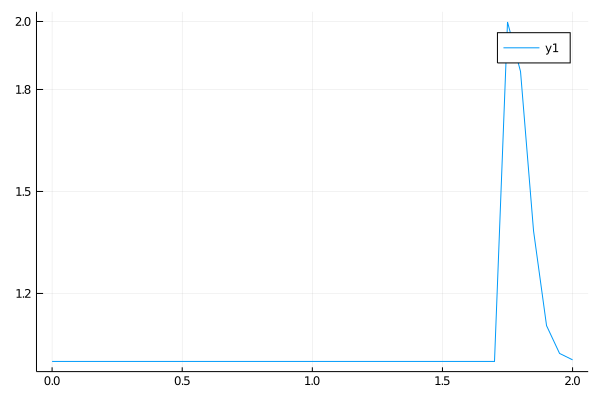

In [18]:
uⁿ⁺¹ = similar(u₀)
uⁿ⁺¹ .= u₀

uⁿ = similar(u₀)

for n in 1:nt
    uⁿ .= uⁿ⁺¹
    for i in 2:nx
        uⁿ⁺¹[i] = uⁿ[i] - uⁿ[i] * Δt/Δx * (uⁿ[i] - uⁿ[i-1])
    end
end

plot(x, uⁿ⁺¹)

What do you observe about the evolution of the hat function under the nonlinear convection equation? What happens when you change the numerical parameters (e.g., nx = 81) and run again?